In [5]:
# Perform the standard numpy and units imports
import numpy as np
import matplotlib.pyplot as plt
from pint import UnitRegistry
ureg = UnitRegistry()
Q_ = ureg.Quantity
import matplotlib.pyplot as plt
%matplotlib inline
# This notebook is also used for development/testing of the Optics module, so auto reload the Optics module if it changes
import morticia.sensor.optics as optics
%load_ext autoreload
%aimport morticia.sensor.optics
%autoreload 1



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
SpatialFrequencies = Q_(np.arange(0.0, 4.0, 0.01), '1/milliradian')  # Spatial frequencies up to 4 cycles per mrad
Luminance = Q_([0.1, 1, 10, 100, 1000], 'candela/m**2')  # Luminance levels
DisplaySize = Q_(10, 'degrees')  # Square display of width 10 degrees at eye
theCTF = optics.ctf_eye(SpatialFrequencies, Luminance, DisplaySize, 2)  # Compute CTF for 2 eyes at all
                                                                 # spatial frequencies and luminance levels.

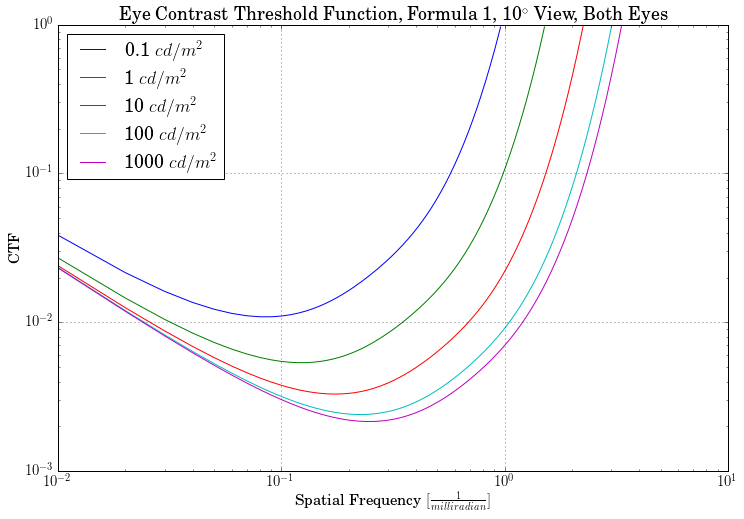

In [7]:
plt.figure(figsize=(12,8))
plt.rc('text', usetex=True)  # Use TeX to render the labels in the plot
plt.rc('font', family='serif', size=15)  # Default to a serif font 
ax = plt.loglog(SpatialFrequencies, theCTF.T)
plt.xlabel('Spatial Frequency $[{:~L}]$'.format(SpatialFrequencies.units))
plt.ylabel('CTF')
plt.title('Eye Contrast Threshold Function, Formula 1, 10$^\circ$ View, Both Eyes')
plt.legend(ax, ['0.1 $cd/m^2$', '1 $cd/m^2$', '10 $cd/m^2$','100 $cd/m^2$', '1000 $cd/m^2$'], loc='upper left')
plt.grid()

In [8]:
# Replicate some of the results in the Barten paper
SpatialFrequencies = Q_(np.arange(0.1, 100.0, 0.1), '1/degree')  # Spatial frequencies up to 100 cycles per degree
SpatialFrequenciesMRAD = SpatialFrequencies.to('1/milliradian')  # Convert to cycles per milliradian
Luminance = Q_([0.1, 1, 10, 100, 1000], 'candela/m**2')  # Luminance levels
DisplaySize = Q_(10, 'degrees')  # Square display of width 10 degrees at eye
theCTF = optics.ctf_eye(SpatialFrequenciesMRAD, Luminance, DisplaySize, 2, formula=11)  # Compute CTF for 2 eyes at all
                                                                 # spatial frequencies and luminance levels.

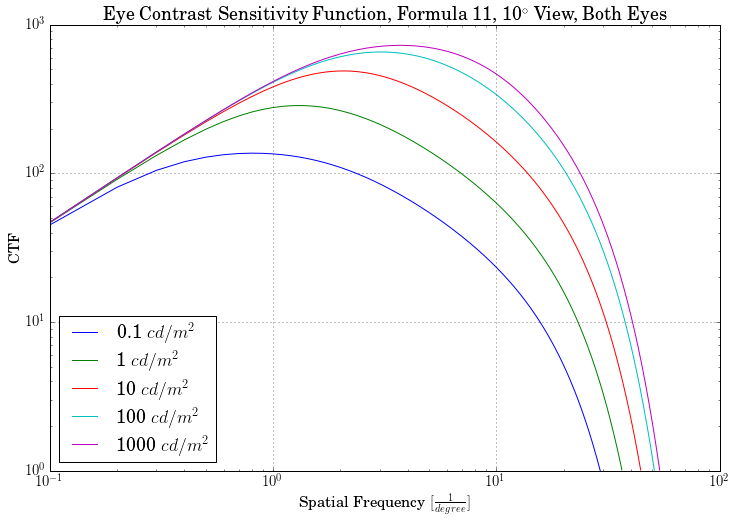

In [9]:
plt.figure(figsize=(12,8))
plt.rc('text', usetex=True)  # Use TeX to render the labels in the plot
plt.rc('font', family='serif', size=15)  # Default to a serif font 
ax = plt.loglog(SpatialFrequencies, 1.0 / theCTF.T)
plt.xlabel('Spatial Frequency $[{:~L}]$'.format(SpatialFrequencies.units))
plt.ylabel('CTF')
plt.title('Eye Contrast Sensitivity Function, Formula 11, 10$^\circ$ View, Both Eyes')
plt.legend(ax, ['0.1 $cd/m^2$', '1 $cd/m^2$', '10 $cd/m^2$','100 $cd/m^2$', '1000 $cd/m^2$'], loc='lower left')
plt.grid()

In [10]:
# Do the Barten plot at various field sizes (figure 8 in the reference)
SpatialFrequencies = Q_(np.arange(0.1, 100.0, 0.1), '1/degree')  # Spatial frequencies up to 100 cycles per degree
SpatialFrequenciesMRAD = SpatialFrequencies.to('1/milliradian')  # Convert to cycles per milliradian
Luminance = Q_(10.0, 'cd/m**2')  # Display luminance
DisplaySizes = Q_([1.25, 2.5, 5.0, 10.0, 20.0, 40.0], 'degrees')  # Display sizes or square root of display area in square degrees
theCTF = optics.ctf_eye(SpatialFrequenciesMRAD, Luminance, DisplaySizes, 2, formula=11)  # Compute CTF for 2 eyes at all
                                                                 # spatial frequencies and luminance levels.

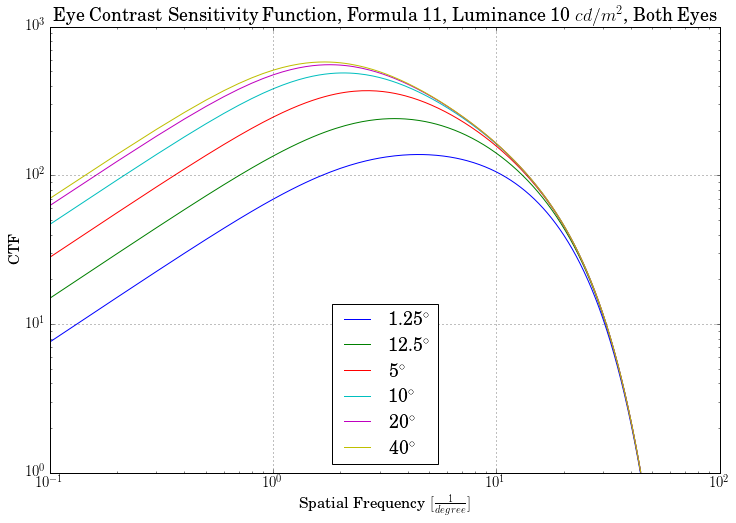

In [11]:
plt.figure(figsize=(12,8))
plt.rc('text', usetex=True)  # Use TeX to render the labels in the plot
plt.rc('font', family='serif', size=15)  # Default to a serif font 
ax = plt.loglog(SpatialFrequencies, 1.0 / theCTF)
plt.xlabel('Spatial Frequency $[{:~L}]$'.format(SpatialFrequencies.units))
plt.ylabel('CTF')
plt.title('Eye Contrast Sensitivity Function, Formula 11, Luminance 10 $cd/m^2$, Both Eyes')
plt.legend(ax, ['1.25$^\circ$', '12.5$^\circ$', '5$^\circ$','10$^\circ$', '20$^\circ$', '40$^\circ$'], loc='lower center')
plt.grid()
